In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("./ecg_autoencoder_dataset.csv",header=None)

In [3]:
X = df.drop([140], axis = 1)
y = df[140]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [6]:
encoder=Sequential([
    Input(shape=(X_train.shape[1],)), # Use x_train.shape[1] to get the number of features
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
])

In [7]:

decoder=Sequential([
    Input(shape=(16,)),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(X_train.shape[1],activation='linear')
])

In [8]:
autoencoder=Sequential([
    encoder,
    decoder
])

In [9]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [10]:
history=autoencoder.fit(X_train,X_train,epochs=100,batch_size=32,shuffle=True,validation_data=(X_test,X_test))


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0125 - loss: 0.7812 - val_accuracy: 0.0940 - val_loss: 0.3166
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0898 - loss: 0.3062 - val_accuracy: 0.1200 - val_loss: 0.2259
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1058 - loss: 0.2026 - val_accuracy: 0.1153 - val_loss: 0.1904
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1128 - loss: 0.1835 - val_accuracy: 0.1533 - val_loss: 0.1636
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1458 - loss: 0.1465 - val_accuracy: 0.1887 - val_loss: 0.1501
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1668 - loss: 0.1551 - val_accuracy: 0.2020 - val_loss: 0.1441
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1746 - loss: 0.1379 - val_accuracy: 0.2100 - val_loss: 0.1344
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1899 - loss: 0.1326 - val_acc

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2850 - loss: 0.0601 - val_accuracy: 0.2800 - val_loss: 0.0754
Epoch 52/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2861 - loss: 0.0594 - val_accuracy: 0.2840 - val_loss: 0.0736
Epoch 53/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2853 - loss: 0.0604 - val_accuracy: 0.2660 - val_loss: 0.0739
Epoch 54/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2914 - loss: 0.0627 - val_accuracy: 0.2800 - val_loss: 0.0750
Epoch 55/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2838 - loss: 0.0640 - val_accuracy: 0.2887 - val_loss: 0.0731
Epoch 56/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2959 - loss: 0.0618 - val_accuracy: 0.2833 - val_loss: 0.0738
Epoch 57/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2833 - loss: 0.0630 - val_accuracy: 0.2873 - val_loss: 0.0740
Epoch 58/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2909 - loss: 0.0668 - val_accuracy:

In [11]:
test_acc,test_loss = autoencoder.evaluate(X_test, X_test)
print("Test Loss: ",test_loss)
print("Accuracy ",test_acc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3171 - loss: 0.0721
Test Loss:  0.3006666600704193
Accuracy  0.07179451733827591


In [12]:
predictions=autoencoder.predict(X_test)
mse=np.mean((X_test-predictions)**2,axis=1)
threshold = np.percentile(mse, 95)
outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
 [[591  31]
 [834  44]]
Classification report:
               precision    recall  f1-score   support

           0       0.41      0.95      0.58       622
           1       0.59      0.05      0.09       878

    accuracy                           0.42      1500
   macro avg       0.50      0.50      0.33      1500
weighted avg       0.52      0.42      0.29      1500



In [13]:
num_anomalies = np.sum(y_test[outliers] == 1)
print(f'Number of anomalies: {num_anomalies}')

Number of anomalies: 44


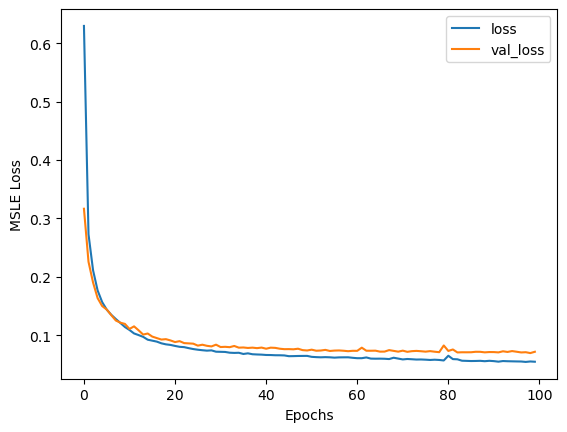

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()